# Practico Redes Neuronales

Librerias a usar:
- tensorflow >= 1.13.1
- tensorboard >= 1.13.1
- keras >= 2.2.4
- Pillow >= 6.0.0
- scikit-learn >= 0.20.3

## Ejercicio 1: Entrenamiento

- Descargue y lea el paper [Using Artificial Intelligence to Predict the Equilibrated Postdialysis Blood Urea Concentration](https://drive.google.com/open?id=1TEcpoTI6mCEhvfpZv3Gp1GBr6uA0Erfg). Utilize redes neuronales para implementar el modelo propuesto en dicha publicacion. Utilice los siguientes [datos](https://drive.google.com/open?id=17bIDVoixcTlUv2JaCDRBRsU1g-WPwnBj) para el entrenamiento. Ayuda: [Tutorial Keras](https://keras.io/getting-started/sequential-model-guide/#examples).
- Si bien se presenta e intenta resolver un problema de regresion, podemos convertirlo en clasificacion utilizando Ueq > 35 como punto de corte. Genere dicha conversion de datos, asignandoles la clase 0 para Ueq < 35 y 1 en caso contrario. Entrene una red de clasificacion.

## Ejercicio 2: Extraccion de caracteristicas

- Descargue el dataset **[pets](https://drive.google.com/open?id=1JyuO-CNruuUdj14SW4s1RExBa3gMhjBi)** con imagenes de gatos y perros.
- Revise y elija dos redes convolucionales pre-entrenadas en *imagenet* de la [pagina](https://keras.io/applications/) de modelos de Keras.
- Genere dos bases de datos con vectores de caracteristicas (features) extraidos utilizando los modelos elegidos en el dataset de mascotas.
    - Tip 1: NO cargue cada imagen introduciendo a mano la ruta a el archivo. Utilice Python para iterar por todo el dataset y cargar los archivos.
    - Tip 2: Recuerde que cada modelo requiere antes un pre-procesamiento de las imagenes.
    - Tip 3: Si carga las imagenes con OpenCV estaran en formato BGR, Keras por defecto usa RGB, recuerde convertir los canales de color.
- Entrene una red neuronal para cada dataset con el objetivo de clasificar entre perros y gatos. Compare los resultados obtenidos entre ambas bases de datos en terminos de accuracy pero tambien en velocidad (que modelo de extraccion de features es mas rapido?).


In [1]:
import numpy as np 
from scipy import misc  
from PIL import Image  
import glob  
import matplotlib.pyplot as plt  
import scipy.misc  
from matplotlib.pyplot import imshow  
%matplotlib inline
from IPython.display import SVG  
import cv2  
import seaborn as sn  
import pandas as pd  
import pickle  
from keras import layers  
from keras.layers import Flatten, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout  
from keras.models import Sequential, Model, load_model  
from keras.preprocessing import image  
from keras.preprocessing.image import load_img  
from keras.preprocessing.image import img_to_array  
from keras.applications.imagenet_utils import decode_predictions  
from keras.utils import layer_utils, np_utils  
from keras.utils.data_utils import get_file  
from keras.applications.imagenet_utils import preprocess_input  
from keras.utils.vis_utils import model_to_dot  
from keras.utils import plot_model  
from keras.initializers import glorot_uniform  
from keras import losses  
import keras.backend as K  
from keras.callbacks import ModelCheckpoint  
from sklearn.metrics import confusion_matrix, classification_report  
import tensorflow as tf  

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar100

(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')

In [3]:
y_train_original

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [4]:
x_train_original


array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [195, 205, 193],
         [212, 224, 204],
         [182, 194, 167]],

        [[255, 255, 255],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [170, 176, 150],
         [161, 168, 130],
         [146, 154, 113]],

        [[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [189, 199, 169],
         [166, 178, 130],
         [121, 133,  87]],

        ...,

        [[148, 185,  79],
         [142, 182,  57],
         [140, 179,  60],
         ...,
         [ 30,  17,   1],
         [ 65,  62,  15],
         [ 76,  77,  20]],

        [[122, 157,  66],
         [120, 155,  58],
         [126, 160,  71],
         ...,
         [ 22,  16,   3],
         [ 97, 112,  56],
         [141, 161,  87]],

        [[ 87, 122,  41],
         [ 88, 122,  39],
         [101, 134,  56],
         ...,
         [ 34,  36,  10],
        

In [5]:
y_train = np_utils.to_categorical(y_train_original, 100)
y_test = np_utils.to_categorical(y_test_original, 100)

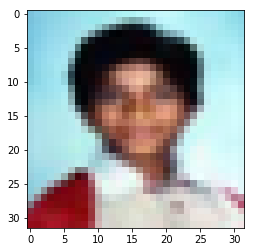

In [6]:
imgplot = plt.imshow(x_train_original[3])
plt.show()

In [7]:
x_train = x_train_original/255  
x_test = x_test_original/255  

In [8]:
K.set_image_data_format('channels_last')  

In [9]:
K.set_learning_phase(1)  


In [10]:
def create_simple_nn():  
  model = Sequential()
  model.add(Flatten(input_shape=(32, 32, 3), name="Input_layer"))
  model.add(Dense(1000, activation='relu', name="Hidden_layer_1"))
  model.add(Dense(500, activation='relu', name="Hidden_layer_2"))
  model.add(Dense(100, activation='softmax', name="Output_layer"))

  return model

In [11]:
snn_model = create_simple_nn()  
snn_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc', 'mse'])  


Instructions for updating:
Colocations handled automatically by placer.


In [12]:
snn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Flatten)        (None, 3072)              0         
_________________________________________________________________
Hidden_layer_1 (Dense)       (None, 1000)              3073000   
_________________________________________________________________
Hidden_layer_2 (Dense)       (None, 500)               500500    
_________________________________________________________________
Output_layer (Dense)         (None, 100)               50100     
Total params: 3,623,600
Trainable params: 3,623,600
Non-trainable params: 0
_________________________________________________________________


In [13]:
snn = snn_model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test, y_test), shuffle=True) 

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 36s 714us/step - loss: 4.1611 - acc: 0.0771 - mean_squared_error: 0.0097 - val_loss: 3.9154 - val_acc: 0.1112 - val_mean_squared_error: 0.0096
Epoch 2/10
50000/50000 [==============================] - 34s 678us/step - loss: 3.7723 - acc: 0.1347 - mean_squared_error: 0.0094 - val_loss: 3.7285 - val_acc: 0.1400 - val_mean_squared_error: 0.0094
Epoch 3/10
50000/50000 [==============================] - 31s 628us/step - loss: 3.6147 - acc: 0.1617 - mean_squared_error: 0.0093 - val_loss: 3.6207 - val_acc: 0.1607 - val_mean_squared_error: 0.0093
Epoch 4/10
50000/50000 [==============================] - 32s 643us/step - loss: 3.5147 - acc: 0.1818 - mean_squared_error: 0.0092 - val_loss: 3.5722 - val_acc: 0.1710 - val_mean_squared_error: 0.0092
Epoch 5/10
50000/50000 [==============================] - 31s 612us/step - loss: 3.4328 - acc: 0.1